<a href="https://colab.research.google.com/github/rodrigorissettoterra/Previsao-de-atraso-em-voos/blob/main/Previsibilidade_nos_atrasos_de_voos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick

print(f'Versão do pandas: {pd.__version__}')
print(f'Versão do numpy: {np.__version__}')
print(f'Versão do scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versão do seaborn: {sns.__version__}')
print(f'Versão do yellowbrick: {yellowbrick.__version__}')

Versão do pandas: 2.1.4
Versão do numpy: 1.26.4
Versão do scikit-learn (sklearn): 1.3.2
Versão do seaborn: 0.13.1
Versão do yellowbrick: 1.5


#Explorando os dados

In [2]:
dados = pd.read_csv('https://raw.githubusercontent.com/rodrigorissettoterra/Previsao-de-atraso-em-voos/main/flights.csv')
dados

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271
...,...,...,...,...,...,...,...,...,...,...,...
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844


In [3]:
print('O conjunto de dados analisado possui:',dados.shape[0],'linhas e',dados.shape[1],'colunas.')

O conjunto de dados analisado possui: 71175 linhas e 11 colunas.


Primeiras observações estatísticas sobre os vôos.

In [4]:
dados[['arrival_time','departure_time','delay']].describe()

,arrival_time,departure_time,delay
count,71175.000000,71175.000000,71175.000000
mean,13.283159,16.480222,12.548378
std,4.023380,4.143705,23.125349
min,7.065594,10.065594,-41.028033
25%,8.939996,12.668655,-4.412876
50%,14.258911,16.376052,9.740454
75%,16.909690,20.041281,27.650853
max,19.341235,23.341235,125.632352


In [5]:
print('DESTAQUES:')
print('- A média de atraso dos vôos é de:',dados['delay'].mean(),'minutos.')
print('- Existem vôos que adiantaram até:',dados['delay'].min(),'minutos.')
print('- Existem vôos que atrasaram até:',dados['delay'].max(),'minutos.')

DESTAQUES:
- A média de atraso dos vôos é de: 12.548378015698628 minutos.
- Existem vôos que adiantaram até: -41.0280332484786 minutos.
- Existem vôos que atrasaram até: 125.63235207172622 minutos.


Primeira análise sobre os tipos dos dados e procurando por valores nulos

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


Visualização gráfica dos dados

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

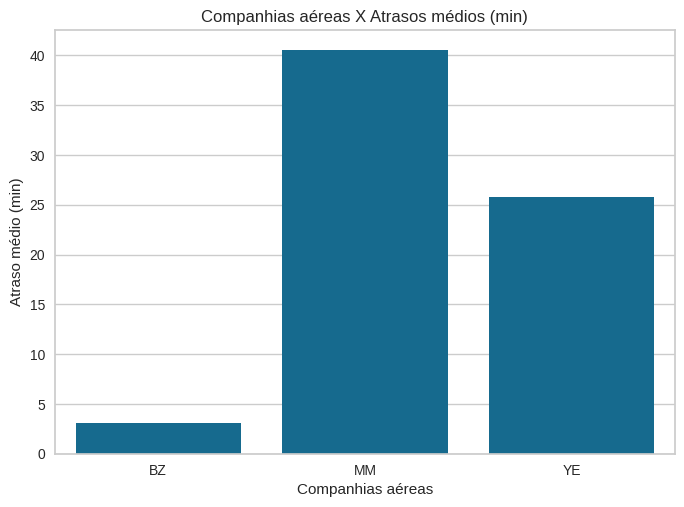

In [8]:
average_delay = dados.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=average_delay)
plt.title('Companhias aéreas X Atrasos médios (min)')
plt.xlabel('Companhias aéreas')
plt.ylabel('Atraso médio (min)')
plt.show()

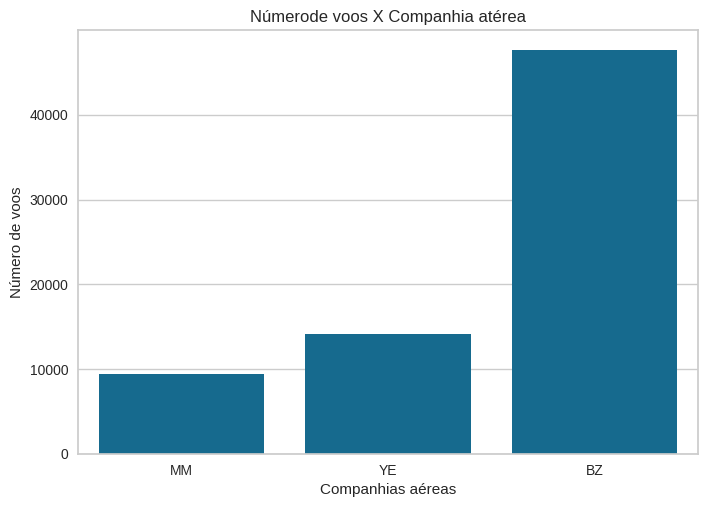

In [9]:
sns.countplot(data=dados, x='airline')
plt.title('Númerode voos X Companhia atérea')
plt.xlabel('Companhias aéreas')
plt.ylabel('Número de voos')
plt.show()

Visualizando o comportamento dos vôos caso seja (ou não) feriado

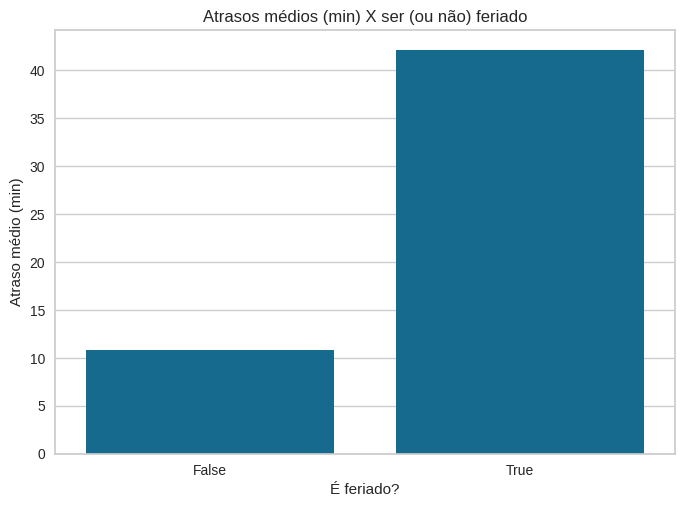

In [10]:
average_delay_feriado = dados.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=average_delay_feriado)
plt.title('Atrasos médios (min) X ser (ou não) feriado')
plt.xlabel('É feriado?')
plt.ylabel('Atraso médio (min)')
plt.show()

Visualizando o comportamento dos vôos, pelas aeronaves existentes

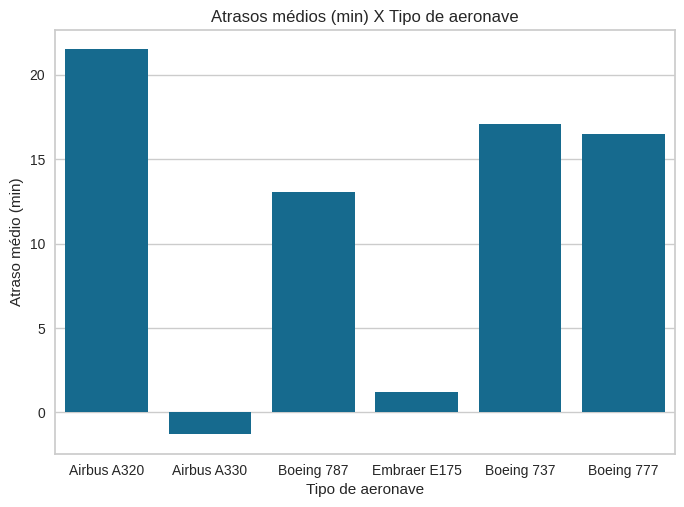

In [11]:
average_delay_aeronave = dados.groupby('aircraft_type')['delay'].mean().reset_index()
sns.barplot(x='aircraft_type', y='delay', data=average_delay_aeronave, order=dados['aircraft_type'].value_counts().index)
plt.title('Atrasos médios (min) X Tipo de aeronave')
plt.xlabel('Tipo de aeronave')
plt.ylabel('Atraso médio (min)')
plt.show()

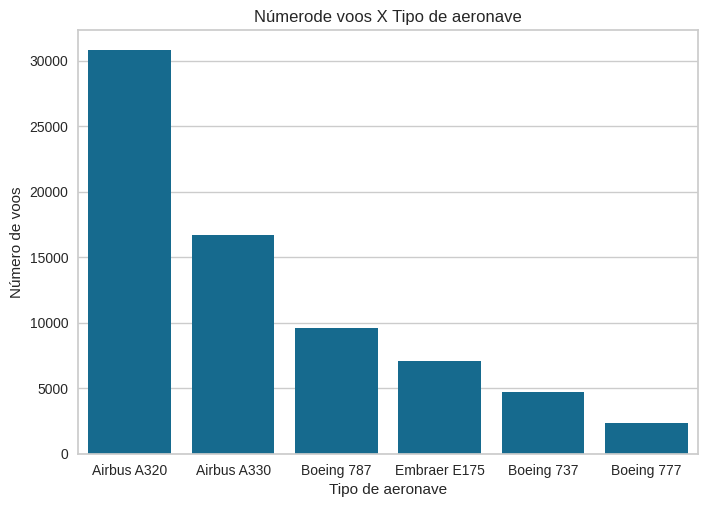

In [12]:
sns.countplot(data=dados, x='aircraft_type', order=dados['aircraft_type'].value_counts().index)
plt.title('Númerode voos X Tipo de aeronave')
plt.xlabel('Tipo de aeronave')
plt.ylabel('Número de voos')
plt.show()

Análise da distribuição dos dados

Horário de chegada

In [13]:
import numpy as np

def calcular_largura_bin(df,coluna):
  Q75, Q25 = np.percentile(df[coluna],[75,25])
  IQR = Q75-Q25
  largura_bin = 2*IQR*np.power(len(df[coluna]),-1/3)
  return largura_bin

<Axes: xlabel='arrival_time', ylabel='Count'>

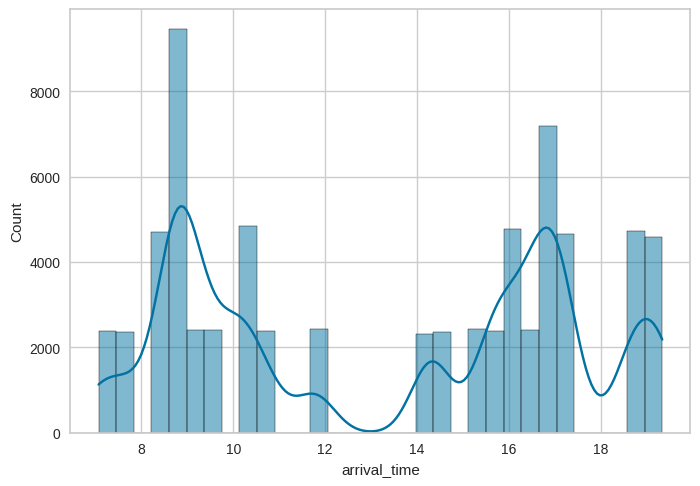

In [14]:
largura_bin_atraso = calcular_largura_bin(dados,'arrival_time')
sns.histplot(data=dados, x='arrival_time', kde=True, binwidth=largura_bin_atraso)

Horário de partida

<Axes: xlabel='departure_time', ylabel='Count'>

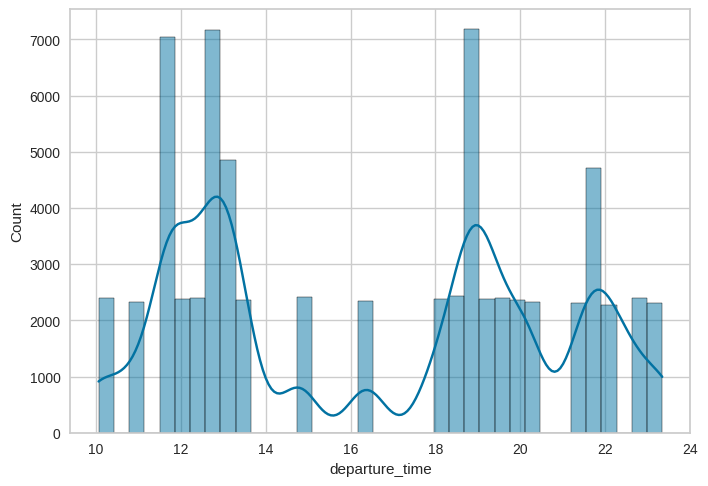

In [15]:
largura_bin_atraso = calcular_largura_bin(dados,'departure_time')
sns.histplot(data=dados, x='departure_time', kde=True, binwidth=largura_bin_atraso)

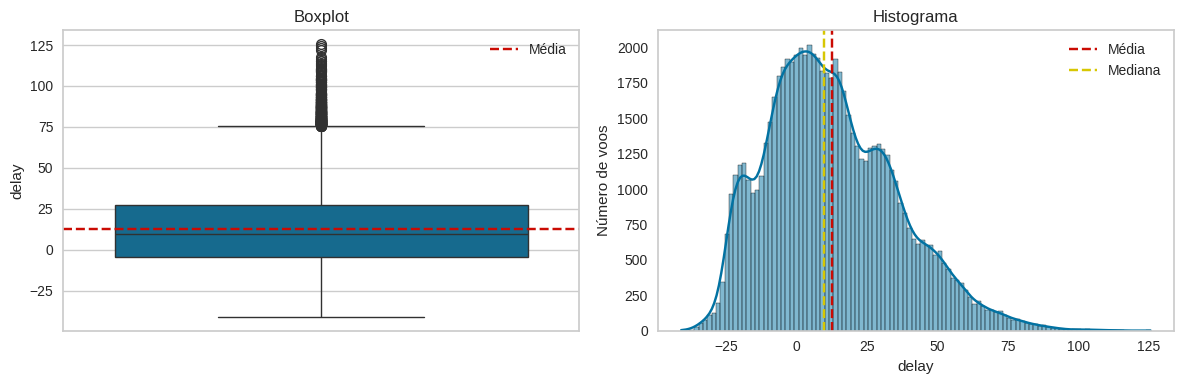

In [16]:
mean_delay = dados['delay'].mean()
median_delay = dados['delay'].median()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.boxplot(data=dados, y='delay', ax=axes[0])
axes[0].set_title('Boxplot')

axes[0].axhline(y=mean_delay, color='r', linestyle='--', label='Média')
axes[0].legend()

largura_bin_delay = calcular_largura_bin(dados, 'delay')
sns.histplot(data=dados, x='delay', ax=axes[1], kde=True, binwidth=largura_bin_delay)
plt.ylabel('Número de voos')
plt.grid(False)
axes[1].set_title('Histograma')

axes[1].axvline(x=mean_delay, color='r', linestyle='--', label='Média')
axes[1].axvline(x=median_delay, color='y', linestyle='--', label='Mediana')
axes[1].legend()

plt.tight_layout()
plt.show()


#Feature Engineering

In [17]:
dados.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

Concatenando colunas de dia (day) e de ano (year), para gerar uma nova coluna

In [18]:
dados['date'] = pd.to_datetime(dados['year'].astype(str) + '-' + (dados['day']+1).astype(str), format='%Y-%j')
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01


Convertendo as datas em dias da semana

In [19]:
dados['is_weekend'] = dados['date'].dt.weekday.isin([5,6])

In [20]:
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False


Verificando se a data é final de semana ou não

In [21]:
dados['day_name'] = dados['date'].dt.day_name()

In [22]:
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False,Friday
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False,Friday
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False,Friday
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False,Friday
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False,Friday


Nomeando as datas com os dias da semana

In [23]:
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False,Friday
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False,Friday
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False,Friday
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False,Friday
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False,Friday


##Feature Encoding

In [24]:
dados.nunique()

,0
flight_id,30
airline,3
aircraft_type,6
schengen,2
origin,10
arrival_time,30
departure_time,30
day,365
year,13
is_holiday,2


In [25]:
dados['schengen'].unique()

array(['non-schengen', 'schengen'], dtype=object)

In [26]:
dados['is_holiday'].unique()

array([False,  True])

In [27]:
dados['is_weekend'].unique()

array([False,  True])

Todas as colunas listadas acima são categóricas

Transformando os dados destas colunas em dados numéricos

In [28]:
dados['schengen'] = dados['schengen'].replace({'non-chengen':0, 'schengen':1})
dados['is_holiday'] = dados['is_holiday'].replace({False:0, True:1})
dados['is_weekend'] = dados['is_weekend'].replace({False:0, True:1})

In [29]:
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,Friday
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,Friday
2,3,BZ,Embraer E175,1,TZF,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,Friday
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,Friday
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,Friday


Método <code>get_dummies</code>, da biblioteca Pandas.

In [30]:
variaveis_categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']
dados_encode = pd.get_dummies(data=dados, columns=variaveis_categoricas, dtype=int)
dados_encode.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,non-schengen,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,non-schengen,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,non-schengen,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,non-schengen,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


Limpeza de dados

In [31]:
dados_encode[['arrival_time', 'departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


A correlação entre ambas as colunas analisadas é praticamente 1, logo podemos eliminar uma delas, com o intuito de simplificar o sistema de previsão.

In [32]:
df_clean = dados_encode.drop(['flight_id','departure_time','day','year','date'], axis=1)
df_clean.head()

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,non-schengen,8.885071,0,70.205981,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,non-schengen,8.939996,0,38.484609,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
2,1,18.635384,0,2.388305,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,non-schengen,15.967963,0,19.138491,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,non-schengen,16.571894,0,15.016271,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


Ajustando os itens da coluna "schengen" que não foram substituídos corretamente.

In [33]:
df_clean['schengen'] = df_clean['schengen'].replace({'non-schengen': 0, 'schengen': 1})
df_clean.head()

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0,8.885071,0,70.205981,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,0,8.939996,0,38.484609,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
2,1,18.635384,0,2.388305,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,15.967963,0,19.138491,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,16.571894,0,15.016271,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


#Seleção e validação do modelo

## Treinamento do Dummy Regressor

Dummy regressor - previsão que utiliza regra simples, apenas com o intuito de comparação entre modelos, tomando como referência (inicialmente) a média do conjunto de dados analisado.

In [34]:
X = df_clean.drop(['delay'], axis=1)
y = df_clean['delay']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [36]:
from sklearn.dummy import DummyRegressor

model_dummy = DummyRegressor()
model_dummy.fit(X_train, y_train)

DummyRegressor()

In [37]:
y_pred_dummy = model_dummy.predict(X_test)

Definindo as métricas de comparação

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calcular_metricas_regressao(y_test, y_pred):

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metricas = {
        'Raiz do Erro Quadrático Médio': round(rmse, 4),
        'Erro Absoluto Médio': round(mae, 4),
        'R2 Score': round(r2, 4)
    }

    return metricas

In [39]:
calcular_metricas_regressao(y_test, y_pred_dummy)

{'Raiz do Erro Quadrático Médio': 23.2241,
 'Erro Absoluto Médio': 18.6127,
 'R2 Score': -0.0}

In [40]:
from sklearn.dummy import DummyRegressor

estrategias = ["mean", "median", ("quantile", 0.25), ("constant", 10.0)]

resultados = {}

for estrategia in estrategias:
    if isinstance(estrategia, tuple):
        estrategia, valor = estrategia
        if estrategia == "quantile":
            model_dummy = DummyRegressor(strategy=estrategia, quantile=valor)
        else:
            model_dummy = DummyRegressor(strategy=estrategia, constant=valor)
    else:
        model_dummy = DummyRegressor(strategy=estrategia)

    model_dummy.fit(X_train, y_train)

    y_pred_dummy = model_dummy.predict(X_test)

    metricas = calcular_metricas_regressao(y_test, y_pred_dummy)

    resultados[estrategia] = metricas

for estrategia, metricas in resultados.items():
    print(f"Estratégia: {estrategia}")
    for metrica, valor in metricas.items():
        print(f"{metrica}: {valor}")
    print("\n")

print("As estratégias utilizadas neste código são: 'mean', 'median', ('quantile', 0.25), ('constant', 10.0).")
print('Cada uma dessas estratégias define como o DummyRegressor faz suas previsões:')
print(" - 'mean': prevê a média dos valores de treinamento.")
print(" - 'median: prevê a mediana dos valores de treinamento.")
print(" - 'quantile': prevê um quantil específico dos valores de treinamento. No caso deste código, o quantil 0.25 é usado.")
print(" - 'constant': prevê um valor constante especificado. No caso deste código, o valor 10.0 é usado.")

Estratégia: mean
Raiz do Erro Quadrático Médio: 23.2241
Erro Absoluto Médio: 18.6127
R2 Score: -0.0


Estratégia: median
Raiz do Erro Quadrático Médio: 23.4038
Erro Absoluto Médio: 18.4891
R2 Score: -0.0155


Estratégia: quantile
Raiz do Erro Quadrático Médio: 28.7943
Erro Absoluto Médio: 22.0382
R2 Score: -0.5372


Estratégia: constant
Raiz do Erro Quadrático Médio: 23.3699
Erro Absoluto Médio: 18.4893
R2 Score: -0.0126


As estratégias utilizadas neste código são: 'mean', 'median', ('quantile', 0.25), ('constant', 10.0).
Cada uma dessas estratégias define como o DummyRegressor faz suas previsões:
 - 'mean': prevê a média dos valores de treinamento.
 - 'median: prevê a mediana dos valores de treinamento.
 - 'quantile': prevê um quantil específico dos valores de treinamento. No caso deste código, o quantil 0.25 é usado.
 - 'constant': prevê um valor constante especificado. No caso deste código, o valor 10.0 é usado.


##Treinamento do Random Forest Regressor

In [41]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(max_depth=5, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

calcular_metricas_regressao(y_test, y_pred_rf)

{'Raiz do Erro Quadrático Médio': 13.7301,
 'Erro Absoluto Médio': 11.0138,
 'R2 Score': 0.6505}

<table style="border-collapse: collapse; width: 100%;">
<tbody>
<tr>
<td style="width: 50%; text-align: left;"><span style="font-size: 20px;"><strong>Dummy Regressor</strong></span></td>
<td style="width: 50%; text-align: left;"><span style="font-size: 20px;"><strong>Random Forest</strong></span></td>
</tr>
<tr>
<td style="width: 50%; text-align: left;">
<div>
<div style="text-align: left;"><span style="font-size: 20px;">{'Raiz do Erro Quadrático Médio': 23.2241,</span></div>
<div style="text-align: left;"><span style="font-size: 20px;">'Erro Absoluto Médio': 18.6127,</span></div>
<div style="text-align: left;"><span style="font-size: 20px;">'R2 Score': -0.0}</span></div>
</div></td>
<td style="width: 50%; text-align: left;">
<div>
<div style="text-align: left;"><span style="font-size: 20px;">{'Raiz do Erro Quadrático Médio': 13.7301,</span></div>
<div style="text-align: left;"><span style="font-size: 20px;">'Erro Absoluto Médio': 11.0138,</span></div>
<div style="text-align: left;"><span style="font-size: 20px;">'R2 Score': 0.6505}</span></div>
</div></td>
</tr>
</tbody>
</table>

</br></br>
Comparação dos resultados obtidos com ambos os modelos (Dummy Regressor e Random Forest)</br>
- Pelo modelo Dummy, temos um erro quadrático médio de ≅ 23 minutos, já no modelo Random Forest, temos um erro quadrático médio de ≅ 13 minutos.</br>
- Pelo modelo Dummy, temos um erro absoluto de ≅ 18 minutos, já no modelo Random forest, temos um erro absoluto médio de ≅ 11 minutos.</p>
- Pelo modelo Dummy o R2 Score tem um valor de 0, já no modelo Random Forest, temos um valor de ≅ 0,65.

**CONCLUSÃO:** Em ambas as métricas de erros apresentadas acima, quanto menor forem seus valores, mais confiável será o modelo (valores menores de erro). Já para o R2 Score, ela varia entre 0 a 1, e representa o quanto o modelo se ajusta à amostra, logo ,quanto mais próximo de 1, melhor.</br></br>

##Cross-Validation

A Validação cruzada é o particionamento do conjunto de dados em subconjuntos mutuamente exclusivos, e posteriormente, o uso de alguns destes subconjuntos para a estimação dos parâmetros do modelo (dados de treinamento), sendo os subconjuntos restantes (dados de validação ou de teste) empregados na validação do modelo.

Neste caso, separamos o conjunto de dados em 5 partes, conforme apresentado na imagem abaixo.

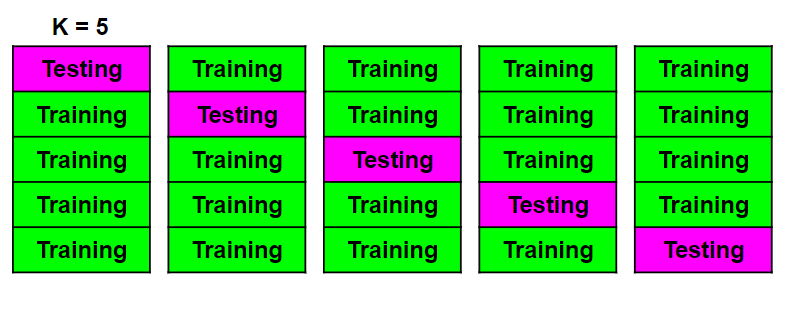

In [42]:
from sklearn.model_selection import KFold, cross_validate

scoring = {
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_validate(model_rf, X_train, y_train, cv=cv, scoring=scoring)
cv_results

{'fit_time': array([3.42875123, 3.20348334, 5.1021986 , 3.02398419, 2.96583486]),
 'score_time': array([0.05926681, 0.07431579, 0.07960749, 0.05974412, 0.06180072]),
 'test_mae': array([-11.07421449, -11.30328674, -11.05630068, -11.14454886,
        -11.17423931]),
 'test_rmse': array([-13.76668658, -14.04881475, -13.79310018, -13.87672957,
        -13.9303929 ]),
 'test_r2': array([0.64679676, 0.62433581, 0.64536956, 0.64090813, 0.63477298])}

In [43]:
for metric in scoring.keys():
    scores = cv_results[f'test_{metric}']
    mean_score = "{:.3f}".format(scores.mean())
    std_score = "{:.3f}".format(scores.std())

    print(f"{metric.upper()} Scores: {[f' {val:.3f}' for val in scores]}")
    print(f"{metric.upper()} Média: {mean_score}, Std: {std_score}")
    print('----------------------------------------------------------------------------------')


MAE Scores: [' -11.074', ' -11.303', ' -11.056', ' -11.145', ' -11.174']
MAE Média: -11.151, Std: 0.088
----------------------------------------------------------------------------------
RMSE Scores: [' -13.767', ' -14.049', ' -13.793', ' -13.877', ' -13.930']
RMSE Média: -13.883, Std: 0.101
----------------------------------------------------------------------------------
R2 Scores: [' 0.647', ' 0.624', ' 0.645', ' 0.641', ' 0.635']
R2 Média: 0.638, Std: 0.008
----------------------------------------------------------------------------------


'MAE': Mean Absolute Error

'RMSE': Root Mean Square Error

'R2': R² Score

#Otimização de hiperparâmetros

##Seleção de recursos

Verificação dos recursos mais relevantes para o nosso modelo

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


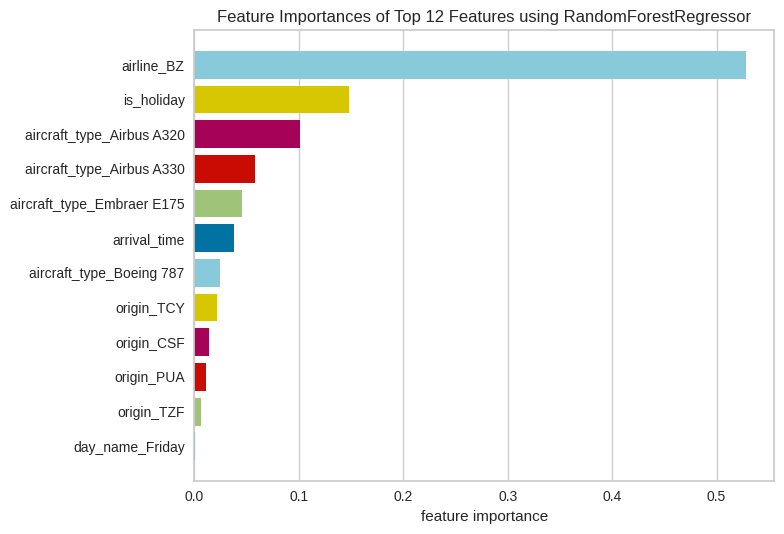

<Axes: title={'center': 'Feature Importances of Top 12 Features using RandomForestRegressor'}, xlabel='feature importance'>

In [44]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(model_rf, relative=False, topn=12)
viz.fit(X_train, y_train)
viz.show()

In [45]:
importances = model_rf.feature_importances_
feature_importances = pd.DataFrame({'Features': X.columns, 'Importances': importances})
feature_importances.sort_values('Importances', ascending=False)

,Features,Importances
4,airline_BZ,0.528604
2,is_holiday,0.147833
7,aircraft_type_Airbus A320,0.100719
8,aircraft_type_Airbus A330,0.058221
12,aircraft_type_Embraer E175,0.045619
1,arrival_time,0.037614
11,aircraft_type_Boeing 787,0.024663
20,origin_TCY,0.022120
15,origin_CSF,0.013979
19,origin_PUA,0.011385


As 12 features mais relevantes para o nosso modelo. As mesmas 12 que foram utilizadas para gerar o gráfico anterior.

In [46]:
feature_importances.sort_values('Importances', ascending=False).head(12)

,Features,Importances
4,airline_BZ,0.528604
2,is_holiday,0.147833
7,aircraft_type_Airbus A320,0.100719
8,aircraft_type_Airbus A330,0.058221
12,aircraft_type_Embraer E175,0.045619
1,arrival_time,0.037614
11,aircraft_type_Boeing 787,0.024663
20,origin_TCY,0.022120
15,origin_CSF,0.013979
19,origin_PUA,0.011385


Verificando quantas Features são relevantes para o nosso modelo

In [47]:
results_df = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])

model_selected_features = RandomForestRegressor(random_state=42, max_depth=5)

for count in [1,5,10,15,20,25,30]:
  selected_features = feature_importances['Features'].values[:count]

  X_train_selected = X_train[selected_features]
  X_test_selected = X_test[selected_features]

  model_selected_features.fit(X_train_selected, y_train)

  y_pred = model_selected_features.predict(X_test_selected)

  metricas = calcular_metricas_regressao(y_test, y_pred)

  results_df[count] = list(metricas.values())

results_df

,1,5,10,15,20,25,30
RMSE,23.0970,14.9389,14.3002,13.7406,13.7387,13.7284,13.7301
MAE,18.5637,12.0211,11.4904,11.0253,11.0242,11.0127,11.0138
R2,0.0109,0.5862,0.6208,0.6499,0.6500,0.6506,0.6505


Podemos notar, seguindo horizontalmente os valores obtidos, que:
- À partir de 15 Features, nosso modelo praticamente não melhora seu desempenho.
- Nosso número ideal de Features deve estar entre 10 e 15.
- Refazer o teste, focado em um intervalo de 10 a 15 Features.

In [48]:
results_df = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])

model_selected_features = RandomForestRegressor(random_state=42, max_depth=5)

for count in range(10,16):
  selected_features = feature_importances['Features'].values[:count]

  X_train_selected = X_train[selected_features]
  X_test_selected = X_test[selected_features]

  model_selected_features.fit(X_train_selected, y_train)

  y_pred = model_selected_features.predict(X_test_selected)

  metricas = calcular_metricas_regressao(y_test, y_pred)

  results_df[count] = list(metricas.values())

results_df

,10,11,12,13,14,15
RMSE,14.3002,14.3002,14.3939,13.7410,13.7410,13.7406
MAE,11.4904,11.4904,11.4096,11.0256,11.0254,11.0253
R2,0.6208,0.6208,0.6159,0.6499,0.6499,0.6499


O valor ideal de Features para o nosso modelo é 13.

In [49]:
selected_features = feature_importances['Features'].values[:13]
X_selected_features = X[selected_features]
X_selected_features

,schengen,arrival_time,is_holiday,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Boeing 737,aircraft_type_Boeing 777,aircraft_type_Boeing 787,aircraft_type_Embraer E175
0,0,8.885071,0,0,0,1,0,1,0,0,0,0,0
1,0,8.939996,0,0,0,0,1,1,0,0,0,0,0
2,1,18.635384,0,0,1,0,0,0,0,0,0,0,1
3,0,15.967963,0,0,1,0,0,0,1,0,0,0,0
4,0,16.571894,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1,18.635384,1,1,1,0,0,0,0,0,0,0,1
71171,0,16.718722,1,1,1,0,0,0,1,0,0,0,0
71172,1,8.564949,1,1,0,1,0,0,0,0,0,1,0
71173,1,9.344097,1,1,1,0,0,1,0,0,0,0,0


Dividindo-se novamente o X_train, X_test, y_train e y_test

In [50]:
X_train, x_test, y_train, y_test = train_test_split(X_selected_features, y, random_state=42)

Desta forma, a complexidade do modelo foi melhorada.

O próximo objetivo é melhorar a performance do modelo.

##Otimizando os hiperparâmetros com GridSearchCV

In [51]:
param_grid = {
'max_depth': [5, 10, 15],
'min_samples_leaf': [1, 2, 3],
'min_samples_split': [2, 4, 6],
'n_estimators': [100, 150, 200]
}

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

model_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=cv,)

model_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [54]:
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [59]:
y_pred_model_grid = model_grid.predict(x_test)

metricas_model_grid = calcular_metricas_regressao(y_test, y_pred_model_grid)
metricas_model_grid

{'Raiz do Erro Quadrático Médio': 13.2635,
 'Erro Absoluto Médio': 10.6731,
 'R2 Score': 0.6738}

In [60]:
results_df['model_grid'] = list(metricas_model_grid.values())

In [61]:
results_df

,10,11,12,13,14,15,model_grid
RMSE,14.3002,14.3002,14.3939,13.7410,13.7410,13.7406,13.2635
MAE,11.4904,11.4904,11.4096,11.0256,11.0254,11.0253,10.6731
R2,0.6208,0.6208,0.6159,0.6499,0.6499,0.6499,0.6738


Se comparado com os modelos anteriores, o model_grid possui menores erros, como RMSE e MAE, e maior R2-Score, o que o torna um modelo melhor!

#Salvando o modelo para usos futuros

In [62]:
import pickle

In [63]:
try:
  with open('modelo_producao.pkl', 'wb') as file:
    pickle.dump(model_grid.best_estimator_, file)
  print('Modelo salvo com sucesso!')
except:
  print('Erro ao salvar o modelo:', str(e))

Modelo salvo com sucesso!
